<a href="https://colab.research.google.com/github/reedikpoopuu/tinyML/blob/main/HorsesAreHumans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Download the neccessary data into the Colab Instance

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2025-04-18 17:05:59--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.96.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  36.4MB/s    in 4.5s    

2025-04-18 17:06:04 (31.6 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2025-04-18 17:06:04--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.96.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zi

In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [3]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('/tmp/horse-or-human/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('/tmp/validation-horse-or-human/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('/tmp/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse05-9.png', 'horse13-8.png', 'horse01-8.png', 'horse44-7.png', 'horse24-9.png', 'horse42-0.png', 'horse40-1.png', 'horse11-9.png', 'horse45-0.png', 'horse05-3.png']
['human16-03.png', 'human14-12.png', 'human16-13.png', 'human01-19.png', 'human17-03.png', 'human14-11.png', 'human17-12.png', 'human16-05.png', 'human05-06.png', 'human16-15.png']
['horse1-510.png', 'horse2-383.png', 'horse5-303.png', 'horse5-018.png', 'horse3-484.png', 'horse3-198.png', 'horse1-224.png', 'horse4-541.png', 'horse6-089.png', 'horse1-105.png']
['valhuman05-12.png', 'valhuman05-01.png', 'valhuman04-14.png', 'valhuman05-20.png', 'valhuman02-16.png', 'valhuman02-01.png', 'valhuman03-20.png', 'valhuman04-10.png', 'valhuman01-12.png', 'valhuman05-24.png']


In [4]:
import tensorflow as tf

## Define your model and optimizer

In [5]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class
    # ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,617,665 (9.99 MB)

 Trainable params: 2,617,665 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

## Organize your data into Generators

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented according to whichever lines are uncommented
# below. We can first try without any of the augmentation beyond the rescaling
train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest'
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human',
        target_size=(100, 100),
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Train your model
This may take a little while. Remember we are now building and training relatively complex computer vision models!

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=100,
      verbose=1,
      validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - acc: 0.4789 - loss: 0.6937 - val_acc: 0.5000 - val_loss: 0.6882
Epoch 2/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.5156 - loss: 0.6808

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - acc: 0.5156 - loss: 0.6808 - val_acc: 0.5000 - val_loss: 0.6868
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 873ms/step - acc: 0.6866 - loss: 0.6795 - val_acc: 0.5156 - val_loss: 0.6582
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - acc: 0.6484 - loss: 0.6489 - val_acc: 0.5000 - val_loss: 0.6662
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 755ms/step - acc: 0.6426 - loss: 0.6522 - val_acc: 0.8984 - val_loss: 0.6132
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - acc: 0.8359 - loss: 0.6152 - val_acc: 0.6445 - val_loss: 0.6072
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 920ms/step - acc: 0.7935 - loss: 0.5858 - val_acc: 0.8906 - val_loss: 0.5018
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - acc: 0.6667 - loss: 0.6417 - val_acc: 0.5000 - val_loss: 0.8767
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 780ms/step - acc: 0.7061 - loss: 0.5877 - val_acc: 0.8789 - val_loss: 0.4490
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - acc: 0.9062 - loss: 0

## Run your Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human. **Was the model correct? Try a couple more images and see if you can confuse it!**

In [10]:
import numpy as np
from google.colab import files
from tensorflow.keras import utils

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = utils.load_img(path, target_size=(100, 100))
  x = utils.img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


KeyboardInterrupt: 

## Finally lets visualize all of the model layers!

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 100, 100, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


<ipython-input-11-5d471ab4da3e>:50: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-11-5d471ab4da3e>:53: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


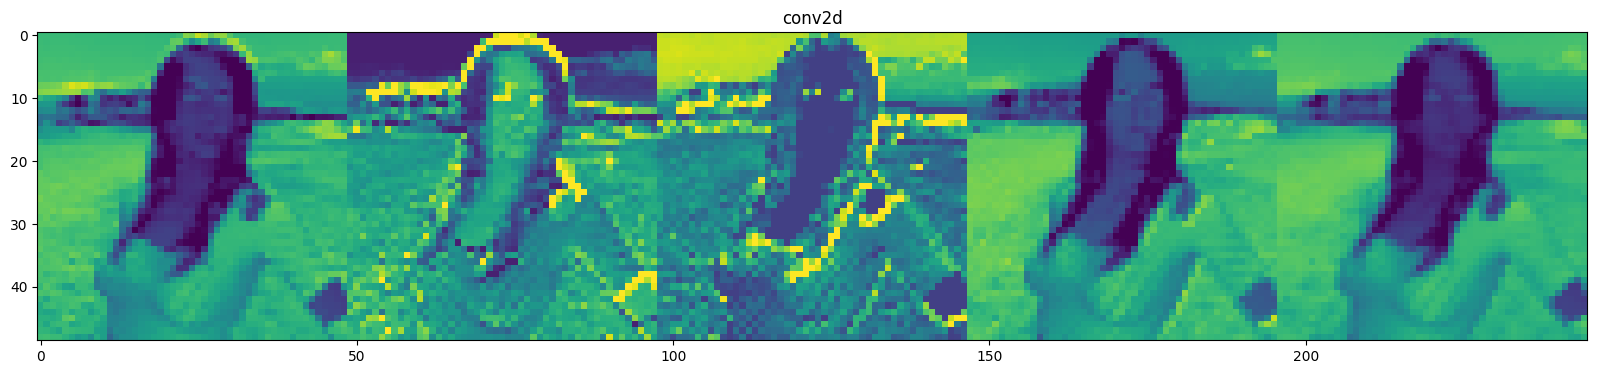

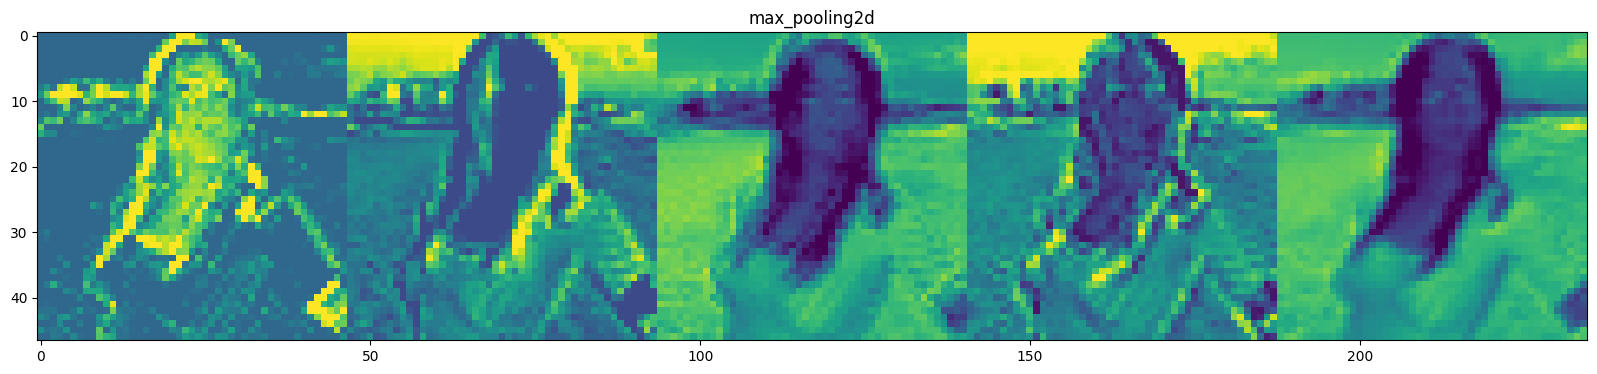

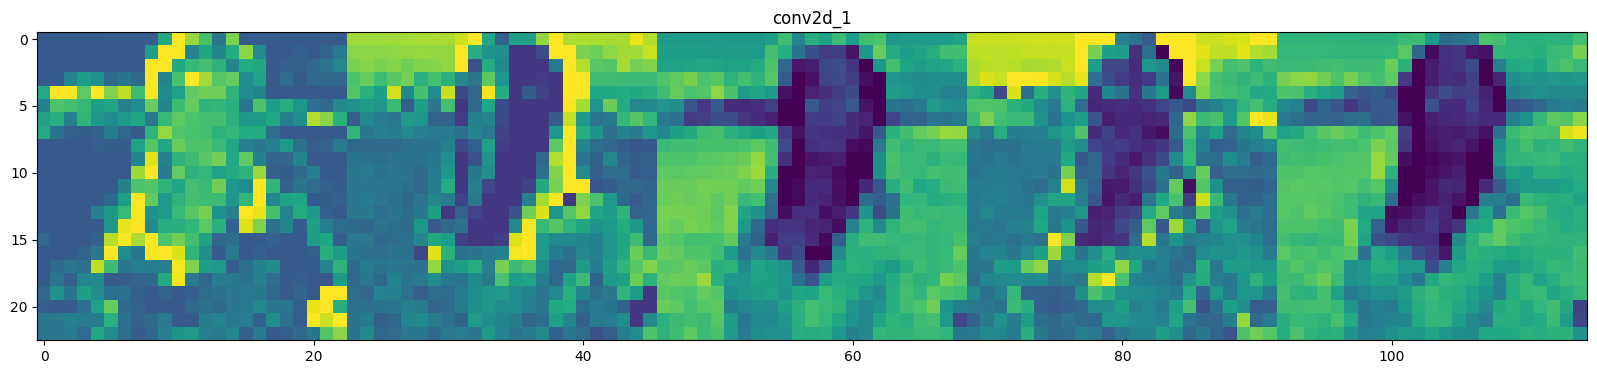

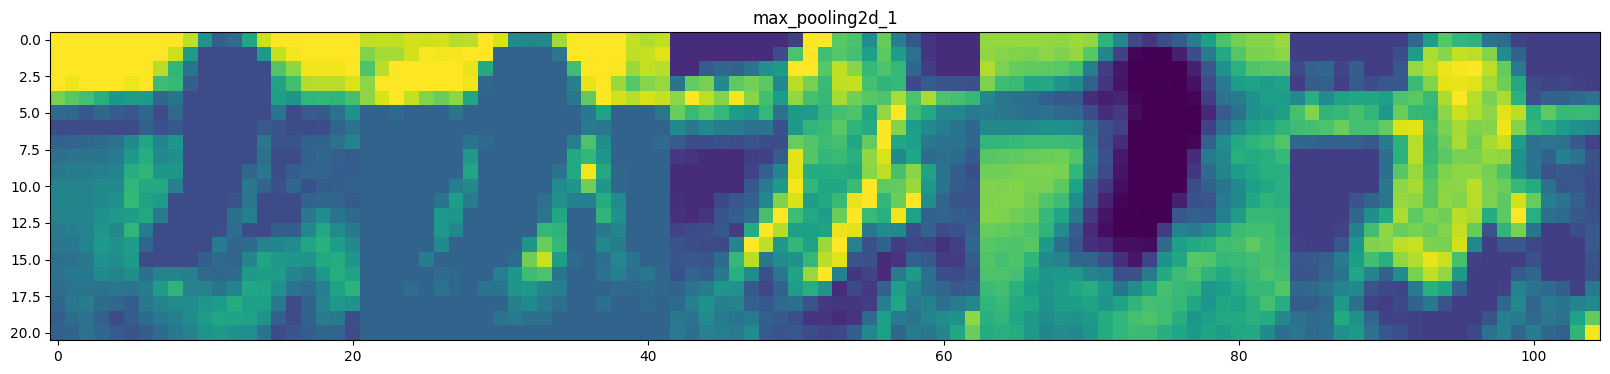

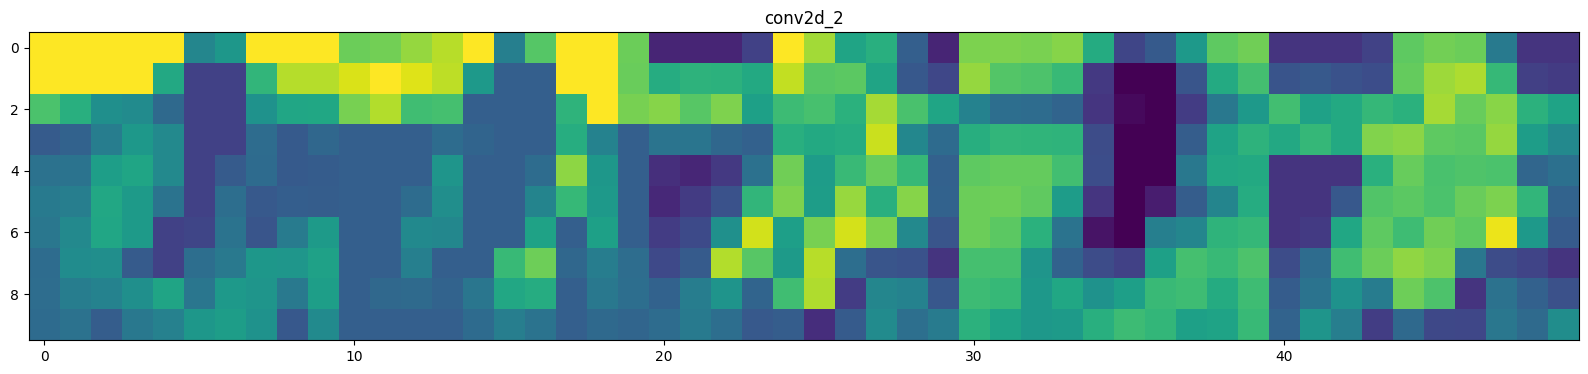

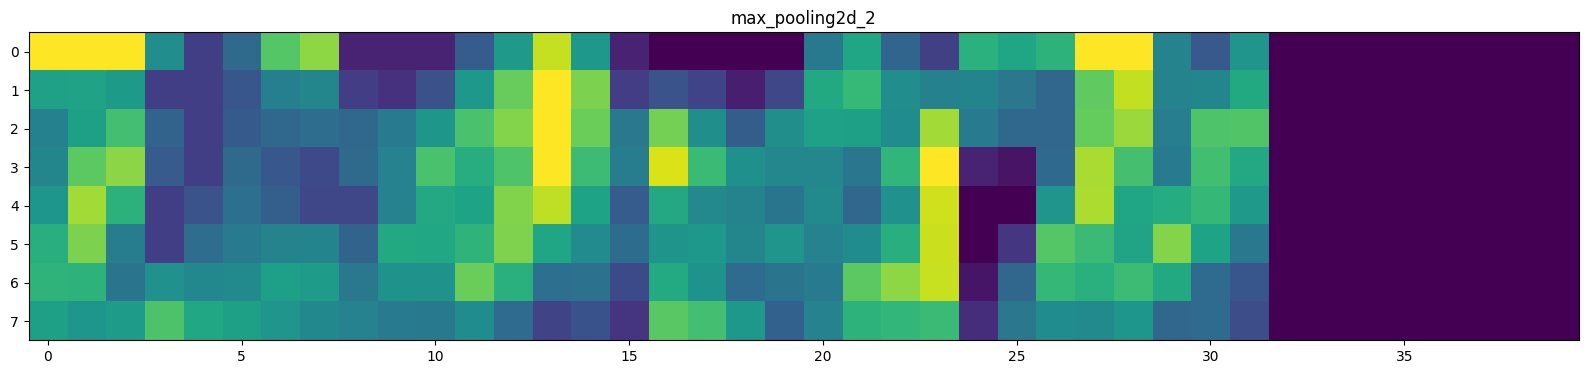

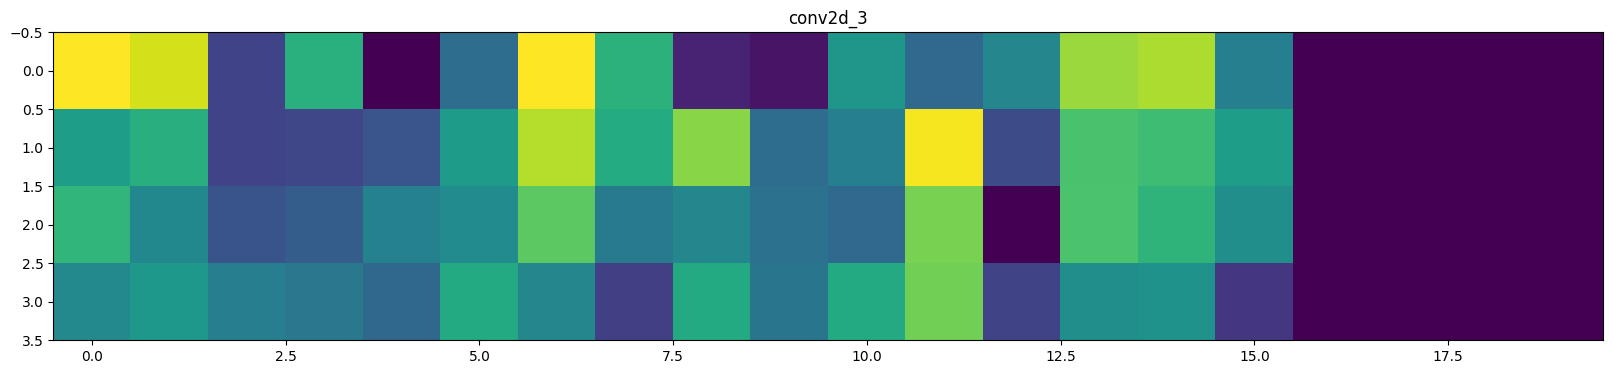

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
# uncomment the following line if you want to pick the Xth human file manually
img_path = human_img_files[0]

img = load_img(img_path, target_size=(100, 100))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (100, 100, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 100, 100, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = min(n_features,5) # limit to 5 features for easier viewing
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)